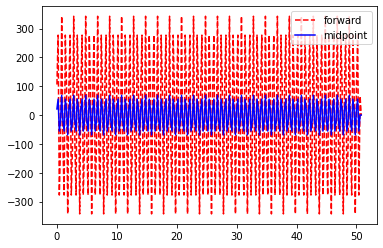

In [63]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate 

#Ex. 100

pi = np.pi
BIG = 5
timesize = 50
stepsize = 1/BIG
def position(time):
    y =  (10/6*pi)*np.cos((6*pi/10)*time)
    return y



def forward_derivative(function_values):
    derivative_values = np.zeros(len(function_values))
    for ii in range(0, len(function_values)-1):
        derivative_values[ii] = (function_values[ii+1] - function_values[ii])/stepsize
    return derivative_values

def midpoint_second_derivative(function_values):
    second_derivative_values = np.zeros(len(function_values))
    for ii in range(0, len(function_values)-2):
        second_derivative_values[ii] = (function_values[ii + 2] - 2*function_values[ii+ 1] +function_values[ii])/stepsize
    return second_derivative_values

#time, position, velocity and acceleration arrays
t_forward = [ii for ii in np.arange(0,timesize+1, stepsize)]
x_forward = [position(ii) for ii in range(len(t_forward))]
v_forward = forward_derivative(x_forward)
a_forward = forward_derivative(v_forward)
a_midpoint = midpoint_second_derivative(x_forward)

plt.plot(t_forward, a_forward, 'r--', label='forward')
plt.plot(t_forward, a_midpoint, 'b-', label='midpoint')
plt.legend()
plt.show()


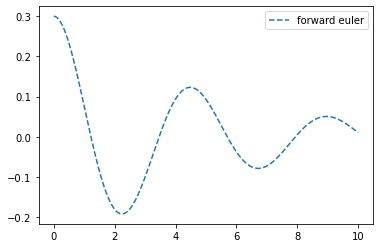

In [94]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate 

#ex. 101

#variables
timesize = 10
BIG = 1000
timestep = 1/BIG

k = 133.7
m = 66.6
km = k/m
y = 0.2

x_0 = 0.30
v_0 = 0.0

#define arrays
time_array = [ii for ii in np.arange(0, timesize, timestep)]
position_array = np.zeros(len(time_array))
position_array[0] = x_0
position_array[1] = x_0 + v_0 * stepsize

#define function to calculate the next step
#assuming the differential equation is discretised properly
def forward_euler(x):
    for ii in range(2, len(x)):
        vel = (x[ii-1] - x[ii-2])/timestep
        acc = -2 * y * vel - km * x[ii-2]
        x[ii] = acc * timestep**2 + 2*x[ii-1] - x[ii-2]
    return x

def exact_solution(t):
    y = 0.3 * np.cos(np.sqrt(km)*t)
    return y
exact_solution_array = [exact_solution(time_array[ii]) for ii in range(len(time_array))]
plt.plot(time_array, forward_euler(position_array), '--', label='forward euler')
plt.plot(time_array, exact_solution_array, label='exact solution')
plt.legend()
plt.show()
